<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/elasticsearchByBaghani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#***import requirements***#
#-------------------------#
import pandas as pd
import keras
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [5]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model = RandomForestClassifier(n_estimators=70, max_depth= 19, min_samples_split=2, random_state=0)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df], axis=1)

766/766 [==============================] - 1s 1ms/step


Report for test set:

               precision    recall  f1-score   support

     class 0       0.48      0.50      0.49      2042
     class 1       0.21      0.20      0.21      1327
     class 2       0.44      0.43      0.44       806

    accuracy                           0.39      4175
   macro avg       0.38      0.38      0.38      4175
weighted avg       0.39      0.39      0.39      4175



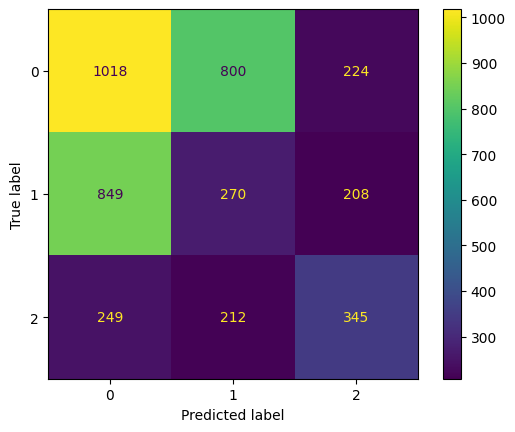

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       0.97      0.97      0.97      8164
     class 1       0.95      0.94      0.95      8164
     class 2       0.95      0.97      0.96      8164

    accuracy                           0.96     24492
   macro avg       0.96      0.96      0.96     24492
weighted avg       0.96      0.96      0.96     24492



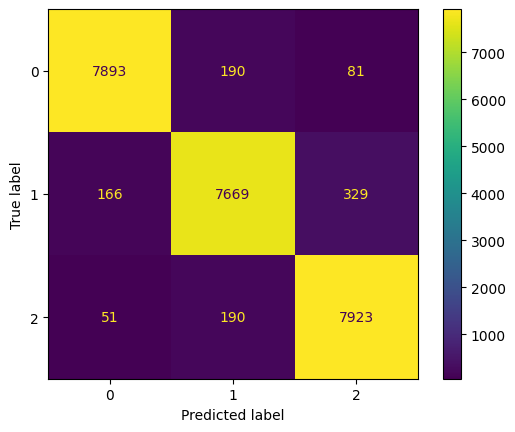

In [6]:
#***Random Forest Classifier***#
#------------------------------#
from sklearn.ensemble import RandomForestClassifier

classifier_randomForest = RandomForestClassifier(n_estimators=5, max_depth= 5, min_samples_split=2, random_state=0)
classifier_randomForest.fit(train_features, train_target.values.ravel())

test_prediction = classifier_randomForest.predict(test_features)
train_prediction = classifier_randomForest.predict(train_features)

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction, labels=classifier_randomForest.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=classifier_randomForest.classes_)
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction, labels=classifier_randomForest.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=classifier_randomForest.classes_)
train_disp.plot()
plt.show()

In [ ]:
#save the random forests models
from joblib import dump

dump(randomForest_model, '/content/drive/MyDrive/Colab projects/SFP/Final_Models/best_random_forest_models/best_random_forest_model.joblib')
dump(classifier_randomForest, '/content/drive/MyDrive/Colab projects/SFP/Final_Models/best_random_forest_models/best_combined_random_forest_model.joblib')

['/content/drive/MyDrive/Colab projects/SFP/Final_Models/best_random_forest_models/best_combined_random_forest_model.joblib']

Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.94      0.90       736
     class 1       0.57      0.41      0.47       185
     class 2       0.52      0.44      0.48        55

    accuracy                           0.81       976
   macro avg       0.65      0.59      0.62       976
weighted avg       0.79      0.81      0.80       976



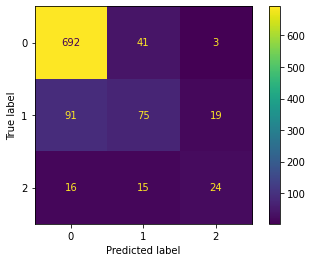

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.99      0.95      0.97      3084
     class 2       0.95      0.99      0.97      3084

    accuracy                           0.98      9252
   macro avg       0.98      0.98      0.98      9252
weighted avg       0.98      0.98      0.98      9252



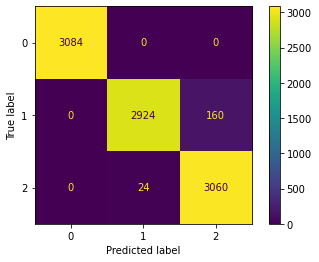

In [ ]:
#***Decision Tree Classifier***#
#------------------------------#
from sklearn import tree
classifier_decisionTree = tree.DecisionTreeClassifier()
classifier_decisionTree.fit(train_features, train_target.values.ravel())

test_prediction = classifier_decisionTree.predict(test_features)
train_prediction = classifier_decisionTree.predict(train_features)

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction, labels=classifier_decisionTree.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=classifier_decisionTree.classes_)
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction, labels=classifier_decisionTree.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=classifier_decisionTree.classes_)
train_disp.plot()
plt.show()

Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.93      0.90       736
     class 1       0.56      0.43      0.49       185
     class 2       0.50      0.40      0.44        55

    accuracy                           0.81       976
   macro avg       0.64      0.59      0.61       976
weighted avg       0.79      0.81      0.80       976



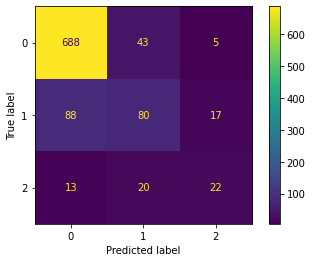

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.84      1.00      0.91      3084
     class 2       0.99      0.82      0.90      3084

    accuracy                           0.94      9252
   macro avg       0.95      0.94      0.94      9252
weighted avg       0.95      0.94      0.94      9252



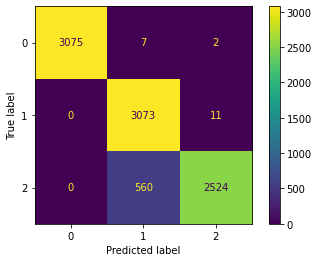

In [ ]:
#***K-Neighbors Classifier***#
#----------------------------#
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(train_features, train_target.values.ravel())

test_prediction = classifier_knn.predict(test_features)
train_prediction = classifier_knn.predict(train_features)

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction, labels=classifier_knn.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=classifier_knn.classes_)
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction, labels=classifier_knn.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=classifier_knn.classes_)
train_disp.plot()
plt.show()

Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.93      0.90       736
     class 1       0.55      0.42      0.48       185
     class 2       0.50      0.44      0.47        55

    accuracy                           0.80       976
   macro avg       0.64      0.60      0.61       976
weighted avg       0.79      0.80      0.79       976



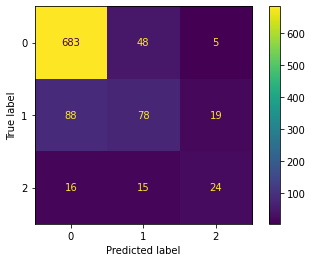

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.99      0.95      0.97      3084
     class 2       0.95      0.99      0.97      3084

    accuracy                           0.98      9252
   macro avg       0.98      0.98      0.98      9252
weighted avg       0.98      0.98      0.98      9252



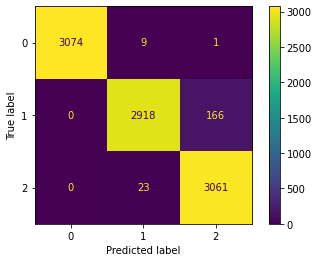

In [ ]:
#***SVM Classifier***#
#--------------------#
from sklearn import svm

classifier_svm = svm.SVC()
classifier_svm.fit(train_features, train_target.values.ravel())

test_prediction = classifier_svm.predict(test_features)
train_prediction = classifier_svm.predict(train_features)

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction, labels=classifier_svm.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=classifier_svm.classes_)
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction, labels=classifier_svm.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=classifier_svm.classes_)
train_disp.plot()
plt.show()

Test AAE: 0.2627196882692896
Test ARE: 0.2627196882692896
------------------------------
Train AAE: 0.08757768850730983
Train ARE: 0.08757768850730983
--------------------------------------------------------
Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.92      0.90       736
     class 1       0.53      0.42      0.47       185
     class 2       0.50      0.44      0.47        55

    accuracy                           0.80       976
   macro avg       0.63      0.59      0.61       976
weighted avg       0.79      0.80      0.79       976



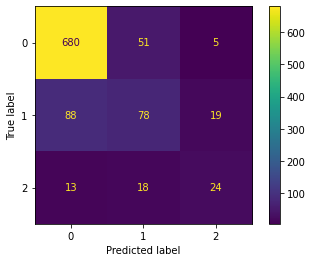

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.99      0.95      0.97      3084
     class 2       0.95      0.99      0.97      3084

    accuracy                           0.98      9252
   macro avg       0.98      0.98      0.98      9252
weighted avg       0.98      0.98      0.98      9252



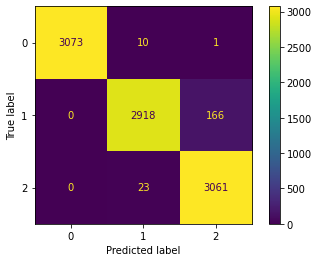

In [ ]:
#***SVM Regression***#
#--------------------#
from sklearn import svm

regresssion_svm = svm.SVR()
regresssion_svm.fit(train_features, train_target.values.ravel())

test_prediction = regresssion_svm.predict(test_features)
train_prediction = regresssion_svm.predict(train_features)

print("Test AAE:", mean_absolute_error(test_target, test_prediction))
print("Test ARE:", mean_absolute_error(test_target, test_prediction))
print("------------------------------")
print("Train AAE:", mean_absolute_error(train_target, train_prediction))
print("Train ARE:", mean_absolute_error(train_target, train_prediction))

print("--------------------------------------------------------")

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(test_prediction), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(test_prediction))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(train_prediction), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(train_prediction))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()

Test AAE: 0.22617666048006496
Test ARE: 0.22617666048006496
-----------------------------
Train AAE: 0.04499333084956555
Train ARE: 0.04499333084956555
--------------------------------------------------------
Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.92      0.90       736
     class 1       0.55      0.42      0.48       185
     class 2       0.50      0.49      0.50        55

    accuracy                           0.80       976
   macro avg       0.64      0.61      0.62       976
weighted avg       0.79      0.80      0.79       976



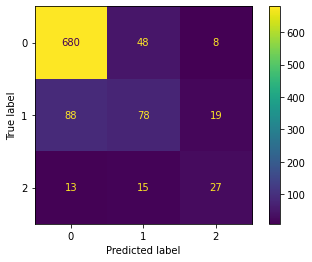

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.99      0.95      0.97      3084
     class 2       0.95      0.99      0.97      3084

    accuracy                           0.98      9252
   macro avg       0.98      0.98      0.98      9252
weighted avg       0.98      0.98      0.98      9252



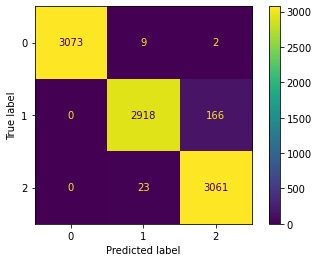

In [ ]:
#***Bayesian Ridge Regression***#
#-------------------------------#
from sklearn import linear_model

regresssion_bayesian = linear_model.BayesianRidge()
regresssion_bayesian.fit(train_features, train_target.values.ravel())

test_prediction = regresssion_bayesian.predict(test_features)
train_prediction = regresssion_bayesian.predict(train_features)

print("Test AAE:", mean_absolute_error(test_target, test_prediction))
print("Test ARE:", mean_absolute_error(test_target, test_prediction))
print("-----------------------------")
print("Train AAE:", mean_absolute_error(train_target, train_prediction))
print("Train ARE:", mean_absolute_error(train_target, train_prediction))

print("--------------------------------------------------------")

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(numpy.where(test_prediction > 2, 2, test_prediction)), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(test_prediction))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(numpy.where(train_prediction > 2, 2, train_prediction)), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(train_prediction))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()

Test AAE: 0.21721311475409835
Test ARE: 0.21721311475409835
-----------------------------
Train AAE: 0.021833117163856462
Train ARE: 0.021833117163856462
--------------------------------------------------------
Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.92      0.90       736
     class 1       0.55      0.42      0.48       185
     class 2       0.50      0.49      0.50        55

    accuracy                           0.80       976
   macro avg       0.64      0.61      0.62       976
weighted avg       0.79      0.80      0.79       976



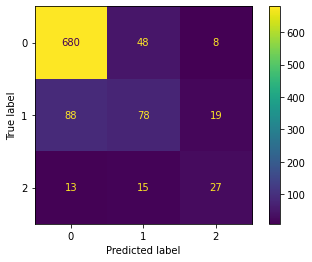

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3084
     class 1       0.99      0.95      0.97      3084
     class 2       0.95      0.99      0.97      3084

    accuracy                           0.98      9252
   macro avg       0.98      0.98      0.98      9252
weighted avg       0.98      0.98      0.98      9252



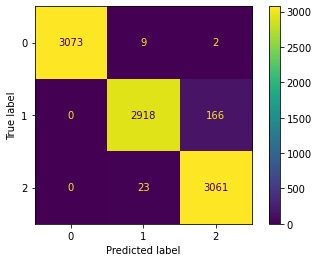

In [ ]:
#***Logistic Regression***#
#-------------------------#
from sklearn.linear_model import LogisticRegression

regresssion_logistic = LogisticRegression(random_state=0)
regresssion_logistic.fit(train_features, train_target.values.ravel())

test_prediction = regresssion_logistic.predict(test_features)
train_prediction = regresssion_logistic.predict(train_features)

print("Test AAE:", mean_absolute_error(test_target, test_prediction))
print("Test ARE:", mean_absolute_error(test_target, test_prediction))
print("-----------------------------")
print("Train AAE:", mean_absolute_error(train_target, train_prediction))
print("Train ARE:", mean_absolute_error(train_target, train_prediction))

print("--------------------------------------------------------")

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(test_prediction), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(test_prediction))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(train_prediction), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(train_prediction))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()

Test AAE: 0.23155737704918034
Test ARE: 0.23155737704918034
-----------------------------
Train AAE: 0.03545179420665802
Train ARE: 0.03545179420665802
--------------------------------------------------------
Report for test set:

               precision    recall  f1-score   support

     class 0       0.87      0.90      0.89       736
     class 1       0.51      0.44      0.47       185
     class 2       0.48      0.45      0.47        55

    accuracy                           0.79       976
   macro avg       0.62      0.60      0.61       976
weighted avg       0.78      0.79      0.79       976



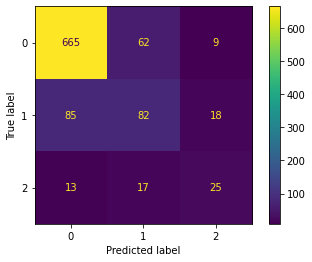

-------------------------------------------------------
Report for train set:

               precision    recall  f1-score   support

     class 0       0.98      0.99      0.99      3084
     class 1       0.96      0.94      0.95      3084
     class 2       0.95      0.97      0.96      3084

    accuracy                           0.96      9252
   macro avg       0.96      0.96      0.96      9252
weighted avg       0.96      0.96      0.96      9252



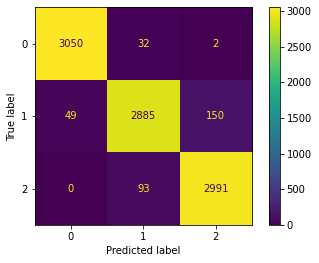

In [ ]:
#***Linear Perceptron***#
#-----------------------#
from sklearn.linear_model import Perceptron

linear_perceptron = Perceptron(tol=1e-3, random_state=0)
linear_perceptron.fit(train_features, train_target.values.ravel())

test_prediction = linear_perceptron.predict(test_features)
train_prediction = linear_perceptron.predict(train_features)

print("Test AAE:", mean_absolute_error(test_target, test_prediction))
print("Test ARE:", mean_absolute_error(test_target, test_prediction))
print("-----------------------------")
print("Train AAE:", mean_absolute_error(train_target, train_prediction))
print("Train ARE:", mean_absolute_error(train_target, train_prediction))

print("--------------------------------------------------------")

target_names = ['class 0', 'class 1', 'class 2']

print("Report for test set:\n\n", classification_report(test_target, numpy.round(test_prediction), target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, numpy.round(test_prediction))
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=['0', '1', '2'])
test_disp.plot()
plt.show()
print("-------------------------------------------------------")
print("Report for train set:\n\n", classification_report(train_target, numpy.round(train_prediction), target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, numpy.round(train_prediction))
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=['0', '1', '2'])
train_disp.plot()
plt.show()